In [1]:
using LinearAlgebra, CSV, Random, Plots, DataFrames, LaTeXStrings,ColorSchemes, Statistics, ProgressBars

In [2]:
function stochastic_seats(radius, seat, trials, init_cap_target,filename_of_best_order )


    # This is a function that returns a vector of max capacity from fixed
    # seating for a given radius using stochastic trials.
    # The functions also returns a csv file of the best order to check seats in.
    # NOTE: csv of seat locations should have only x,y coordinates
    # EXAMPLE: stochastic_seats(2, CSV.read("E15.csv"), 1e4, 10, "best_order_E15.csv" )

    #required packages: CSV, Dataframes, ProgressBar (notebook), Random & LinearAlgebra

    max_num_of_seats = size(seat.x,1)
    seats = convert(Matrix, seat)
    rand_capacity_checks = []

 for b in ProgressBar(1:trials)


    accepted_seats = []
 
    for i in 1:max_num_of_seats        
        accepted_seats = append!(accepted_seats,i)
    end
    

    accepted_seats_rand= shuffle!(accepted_seats)
    accepted_seats_rand_best = deepcopy(accepted_seats_rand)


    for i in 1:length(accepted_seats_rand)
      
        num_to_remove = []
        
         if i <= length(accepted_seats_rand)
             
             #go through each accepted node and determine if too close
             
             for m in 1:length(accepted_seats_rand)
                 
             
                 fixed_seat = seats[accepted_seats_rand[i],1:2]
                 trial_seat = seats[accepted_seats_rand[m],1:2]
                            
                
                 #if too close then add seat number to list 
     
                 if norm(fixed_seat - trial_seat) < radius && isequal(fixed_seat,trial_seat) == 0 
                                     
                 num_to_remove = append!(num_to_remove, accepted_seats_rand[m])
                 
                 end
                                 
             end
        end

       #remove the nodes too close from the accepted list
                    
        for j in 1:length(accepted_seats_rand)
            for k in 1:length(num_to_remove)
                
                if j  <= length(accepted_seats_rand)
                    
                    if accepted_seats_rand[j] == num_to_remove[k]
                        
                        accepted_seats_rand = filter!(x->x≠num_to_remove[k],accepted_seats_rand);
                        
                    end
                end
            end
        end

    end

    capacity_trial = (length(accepted_seats_rand)./max_num_of_seats)*100;
    append!(rand_capacity_checks, capacity_trial);

    #writing a csv of the best order to check seats

    if capacity_trial > init_cap_target
  
        init_cap_target = capacity_trial;
        CSV.write(filename_of_best_order,  DataFrame(transpose(accepted_seats_rand_best)), writeheader=false)

    end

 end

    return rand_capacity_checks

end

stochastic_seats (generic function with 1 method)

In [105]:
#Example - best order finding 

trials = 50000;
radius =  2;
seats = CSV.read("E15.csv");

Capacity = stochastic_seats(radius, seats, trials,13.61256544502617, "best_order_E15_julia.csv" )

println("Max capacity of E15 = ", maximum(Capacity), "%")

#plot(1:trials,Capacity,xlab = L"\textrm{Trials}",ylab=L"\textrm{Capacity} \, (\%)", color="black",linewidth=1.5,legend=false)
#plot!(1:trials,mean(Capacity)*ones(trials),color="red",linewidth=3,linestyle=:dashdot)

#png("/Users/joshuamoore/Dropbox/Julia/Cardiff_maths_seating/example_cap")

100.0%┣██████████████████████████████████┫ 50000/50000 [03:23<00:00, 245.9 it/s]
Max capacity of E15 = 13.089005235602095%


In [124]:
function visualise_seats(radius,seats,best_order,Title::String,display_circles::Bool,Path_to_save_image::String)
    
    # A function that visualises the results of stochastic seats and saves a png to
    # a specified location. You have to option to plot with circles and without. The 
    # plots with circles display radius/2. (No shields).
    # Required packages: CSV, Dataframes, Random & LinearAlgebra.
    #Example: visualise_seats(2,CSV.read("E15.csv"), CSV.read("best_order_E15_julia.csv",header=false), "E15", true, "/Users/joshuamoore/Dropbox/Julia/Cardiff_maths_seating/E15_26_circles")
    
    max_num_of_seats = size(seats.x,1)
    seat_locs = convert(Matrix, seats)
    accepted_seats_mat = (convert(Matrix, best_order))
    
    accepted_seats = []
    
    
    for i in 1:length(accepted_seats_mat)
        accepted_seats = append!(accepted_seats,accepted_seats_mat[i] )
    end

    
    for i in 1:length(accepted_seats)
      
        num_to_remove = []
        
        
         if i <= length(accepted_seats)
             
             #go through each accepted node and determine if too close
             
             for m in 1:length(accepted_seats)
                 
             
                 fixed_seat = seat_locs[round(Int,accepted_seats[i]),1:2]
                 trial_seat = seat_locs[round(Int,accepted_seats[m]),1:2]
                           
                
                 #if too close then add seat number to list 
     
                 if norm(fixed_seat - trial_seat) < radius && isequal(fixed_seat,trial_seat) == 0 
                                     
                 num_to_remove = append!(num_to_remove, accepted_seats[m])
                 
                 end
                      
               
             end
        end

       #remove the nodes too close from the accepted list
                    
        for j in 1:length(accepted_seats)
            for k in 1:length(num_to_remove)
                
                if j  <= length(accepted_seats)
                    
                    if accepted_seats[j] == num_to_remove[k]
                       
                        accepted_seats = filter!(x->x≠num_to_remove[k],accepted_seats);
                        
                    end
                end
            end
        end

    end
    
    
    
    println("Max Capacity = " , (length(accepted_seats)./max_num_of_seats)*100, "%" )
    println("Number of available seats = ", length(accepted_seats))
    
    dpi_value = 300;
    
    scatter(seats.x,seats.y,axis=false,grid=false,xticks=false,yticks=false,legend=false,shape=:x,title=Title,color="Black",markerstrokewidth=5,dpi=dpi_value)
    

    
    if display_circles == true
        #refactor the heatmapper algorithm
        
         nodes_for_heatmapper = Array{Float64,2}(undef, 0, 2);
            
        for q in 1:length(accepted_seats)
            nodes_for_heatmapper = [nodes_for_heatmapper; [ seat_locs[round(Int,accepted_seats[q]),1] seat_locs[round(Int,accepted_seats[q]),2]]];
        end
        
        theta = range(0, 2*pi, length = 100)
        heatmap = zeros(2,100*length(nodes_for_heatmapper[:,1]));
        
        
        for w in 1:length(nodes_for_heatmapper[:,1])
           
            x_circle = 0.5.*radius.*cos.(theta) .+ nodes_for_heatmapper[w,1]; #Defines an intial unsafe perimeter
            y_circle = 0.5.*radius.*sin.(theta) .+ nodes_for_heatmapper[w,2];
        
            heatmap[1,(1+100*(w-1)):(100*(w-1) + 100)] = x_circle;
            heatmap[2,(1+100*(w-1)):(100*(w-1) + 100)] = y_circle;
          
            aspect_ratio = 1
            plot!([heatmap[1,1+100*(w-1):100*(w-1) + 100]],[heatmap[2,1+100*(w-1):100*(w-1) + 100]],color="Black",fill = (0, 0.2, :red),aspect_ratio=:equal,dpi=dpi_value)
            
        end
        

    end
      
    
    #plotting the accepted nodes 
    for i in 1:length(accepted_seats)
        if i == length(accepted_seats)
                 
           display(scatter!([seat_locs[round(Int,accepted_seats[i]),1]],[seat_locs[round(Int,accepted_seats[i]),2]],axis=false,grid=false,xticks=false,yticks=false,legend=false,shape=:o,color="Green",markerstrokewidth=0.1,dpi=dpi_value))
            aspect_ratio = 1
        else
            
           scatter!([seat_locs[round(Int,accepted_seats[i]),1]],[seat_locs[round(Int,accepted_seats[i]),2]],axis=false,grid=false,xticks=false,yticks=false,legend=false,shape=:o,color="Green",markerstrokewidth=0.1,dpi=dpi_value)
        end
    end
    
    
    
    
    png(Path_to_save_image)
    
    
end

visualise_seats (generic function with 1 method)

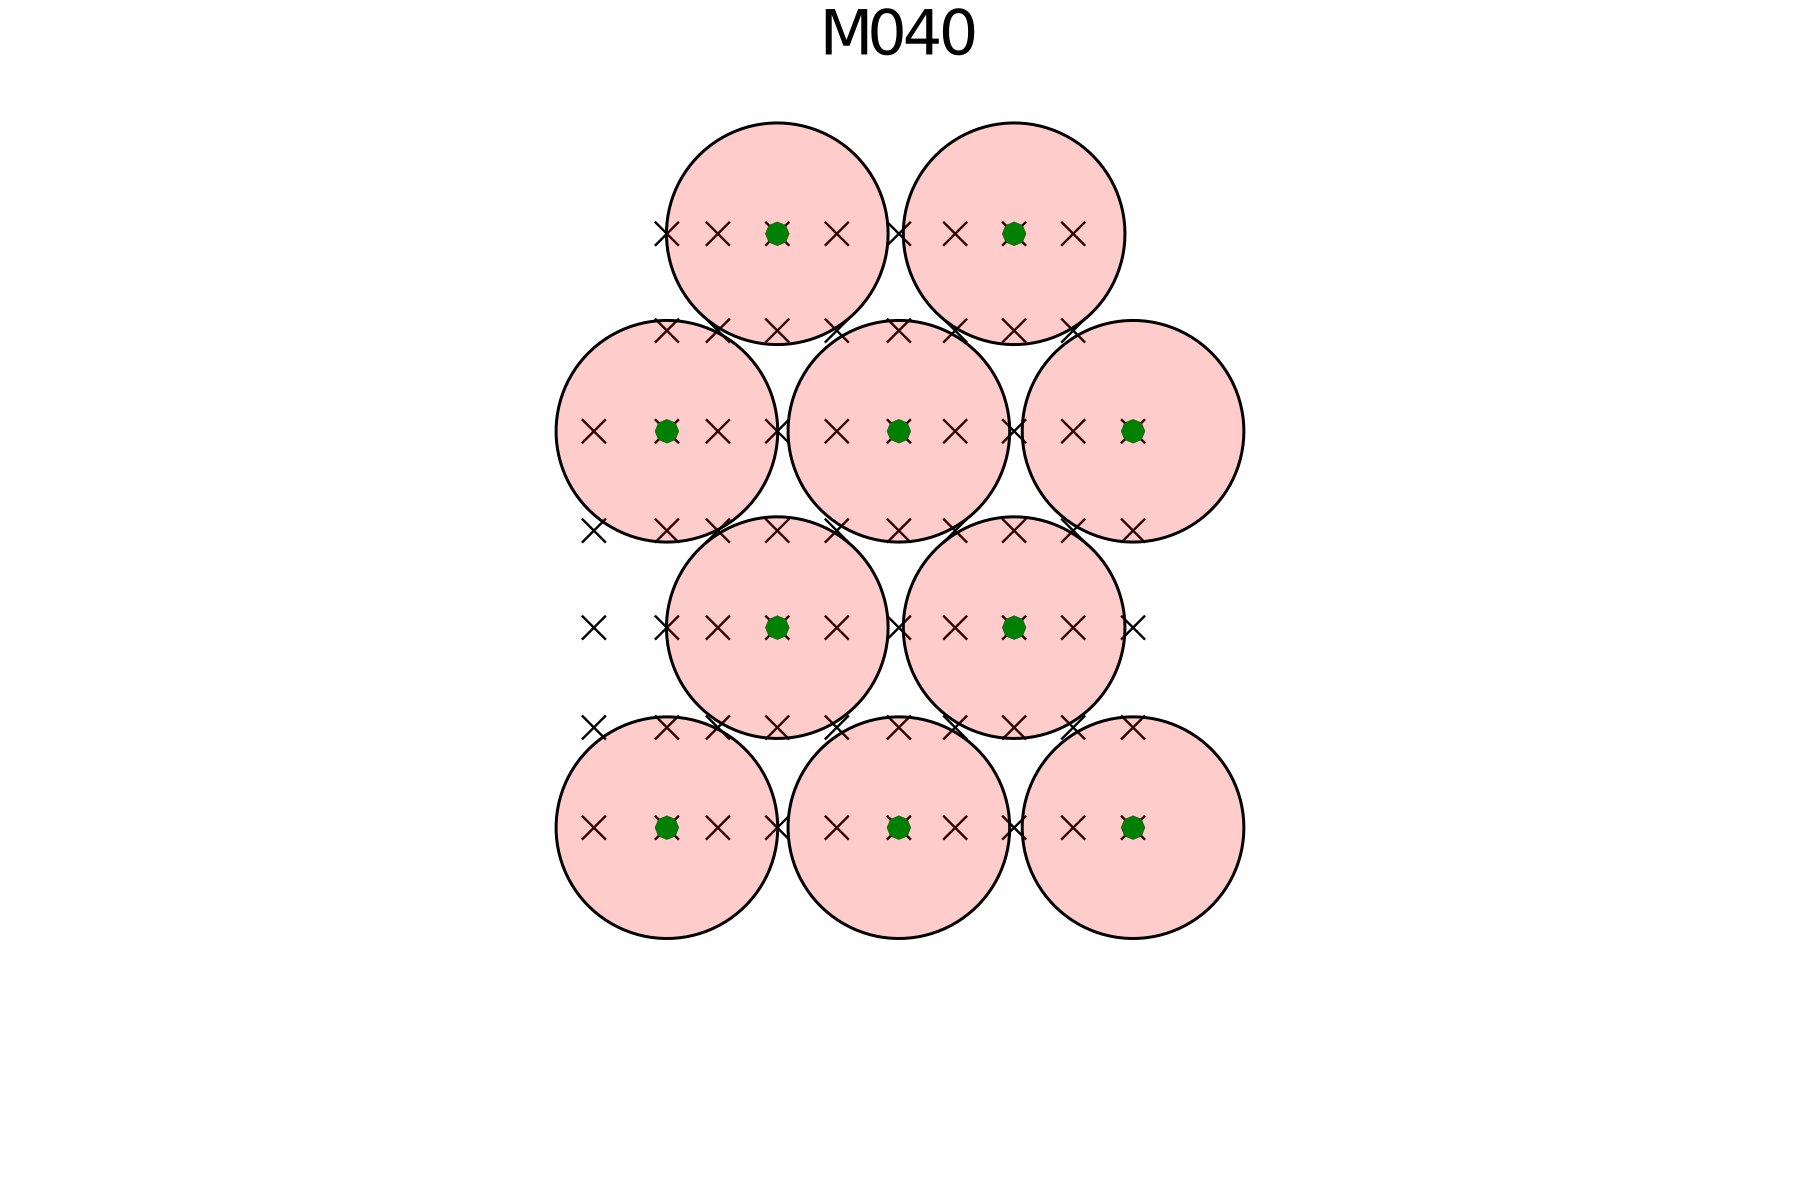

Max Capacity = 15.151515151515152%
Number of available seats = 10


In [128]:
#vis example

radius =  2;
seats = CSV.read("M040.csv");
best_order = CSV.read("best_order_M040_julia.csv",header=false);


visualise_seats(radius,seats,best_order,"M040",true,"/Users/joshuamoore/Dropbox/Julia/Cardiff_maths_seating/M040_10_circles")